<h1> Computer Vision Image Classification </h1>

# Data Input 

In [1]:
#Import anything you need here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
import os


from sklearn.cluster import KMeans
from collections import Counter

<h4> Using the code for reference, take the given folder and create a dataframe with the picture object, and the encoding as listed below. </h4>	
0=Airplanes, 1=Bear, 2=Blimp, 3=Comet, 4=Crab, 5=Dog, 6=Dolphin, 7=Giraffe, 8=Goat, 9=Gorilla, 10=Kangaroo, 11=Killer-Whale, 12=Leopards, 13=Llama, 14= Penguin, 15= Porcupine, 16=Teddy-Bear, 17=Triceratops, 18=Unicorn, 19=Zebra

In [2]:
from os import listdir
from os.path import isfile, join
import cv2

def read_organize_data(file_path):
    #Fill this function out, should return a dataframe with picture object, and correct encoding
    ''' Input: file_path 
                Takes in a file path for training data ONLY, 
                cuz file/folder formatting difference as compared to test data
        
        Returns: A list of lists, where each inner list represents each individual folder, 
                and thus each individual folder (or inner list) holds the array matrices 
                for all the images/pictures within that folder
    '''
    
    pic_files = [ f for f in listdir(file_path)] # "list" out all the files/images within the directory    
    collection = []

    for i in range(1, len(pic_files)): #cuz index 0 is DS.store
        
        folder_path = join(file_path, pic_files[i]) 
        full_img_path = [join(folder_path, img) for img in listdir(folder_path)]
        
        temp = []
        for k in range(len(full_img_path)): 
            img_matrix = io.imread(full_img_path[k])
            temp.append(img_matrix)
            
        collection.append(temp)
    
    
    return collection


In [3]:
starting_data = read_organize_data(r"/Users/samanthatang/Desktop/final_project/20_categories_training/")
# starting_data


In [4]:
def make_dataframe(all_folders):
    ''' Takes in a list of lists where each inner list represents an individual folder 
        which holds all the picture array matrices of that folder
        
        Returns a dataframe where "encoding" represents the specific folder, and 
        each row under the "pictures" column represents an indivdual image belonging to the encoded folder
    '''
    li = []
    
    for k in range(len(all_folders)): 
        folder = all_folders[k]
        
        # NOTE: means that folders with no images are not included in df
        if len(folder) != 0: #folder is not empty 
            for i in range(len(folder)):
#             for i in range(3): #to test small samples
                d = {"pictures": folder[i]}
                encoding = {"encoding": k} 
                
                d.update(encoding)
                li.append(d)
                
    df = pd.DataFrame(li)
    return df
        

# # training_df = make_dataframe(starting_data[:3]) #to test small samples
# training_df = make_dataframe(starting_data)
# training_df.head()

In [5]:
training_df = make_dataframe(starting_data)
training_df.head()

,encoding,pictures
0,1,"[[[75, 93, 79], [34, 52, 38], [27, 48, 33], [2..."
1,1,"[[[231, 205, 188], [228, 180, 144], [217, 179,..."
2,1,"[[[255, 252, 249], [255, 252, 249], [255, 253,..."
3,1,"[[[173, 166, 160], [175, 168, 162], [178, 171,..."
4,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


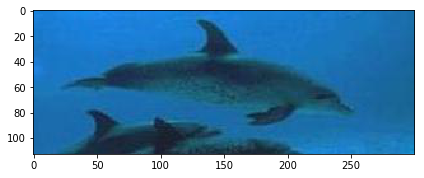

In [6]:
skimage.io.imshow(training_df.iloc[400].values[1])
plt.show()


At this point, we can read in the testing data, and below I've defined a different function to read in the test data since the organization of the testing and training set data is slightly different in the arrangement of folders. At the moment, it was more conveinent to write a simple function, but in the future, I'll probabily generalize the above "read_organize_data" function to also include reading in the test set data regardless of the folder organization.  

In [7]:
def read_test_data(test_file_path): 
    #code courtesy of https://stackoverflow.com/questions/33369832/read-multiple-images-on-a-folder-in-opencv-python/43049639

    ''' Takes in the file path of test set ONLY,
    
        Returns a list of image array matrices for each image
        in the directory file
    '''
    onlyfiles = [f for f in listdir(test_file_path) if isfile(join(test_file_path, f))]
    images = np.empty(len(onlyfiles), dtype=object)
    for n in range(0, len(onlyfiles)):
        images[n] = cv2.imread(join(test_file_path, onlyfiles[n]))
        
    return images

In [8]:
test_starting_data = read_test_data(r"/Users/samanthatang/Desktop/final_project/20_Validation/")
# test_starting_data


Notice that we drop the "encoding" column since we have yet to determine what each image is categorized as. The dataframe was constructed with an encoding column of 0 because of how we defined our "make_dataframe" function, which was mainly constructed to read in the training set data. But in this case, we can simply use the same dataframe creation function and ignore the "encoding" column for convienence.  

In [9]:
test_df = make_dataframe([test_starting_data]) #had to encase test_starting data so that it'll be a list of list 
test_df.head()

,encoding,pictures
0,0,"[[[74, 79, 80], [50, 55, 56], [48, 53, 54], [4..."
1,0,"[[[85, 173, 213], [85, 173, 213], [85, 173, 21..."
2,0,"[[[30, 36, 19], [25, 31, 14], [21, 26, 11], [2..."
3,0,"[[[69, 138, 95], [69, 138, 95], [69, 138, 95],..."
4,0,"[[[242, 204, 162], [242, 203, 164], [242, 203,..."


In [10]:
test_df.drop(columns="encoding", axis=1, inplace=True) #remember to set inplace to True to make this permanent 
test_df.head()

,pictures
0,"[[[74, 79, 80], [50, 55, 56], [48, 53, 54], [4..."
1,"[[[85, 173, 213], [85, 173, 213], [85, 173, 21..."
2,"[[[30, 36, 19], [25, 31, 14], [21, 26, 11], [2..."
3,"[[[69, 138, 95], [69, 138, 95], [69, 138, 95],..."
4,"[[[242, 204, 162], [242, 203, 164], [242, 203,..."


Let's look at the first image of our test set, it looks to be an penguin! (but sideways--which makes me wonder how this will affect my analysis later...will I need to account for the orientation of the image? Perhaps not, if I'm only considering the pixel colors. Though it may be interesting to see if I could somehow incorporate orientation...maybe more penguin photos are displayed/visualized hotdog style instead of hamburger style)

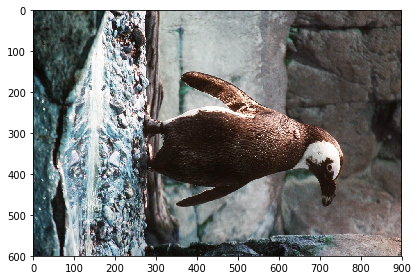

In [11]:
skimage.io.imshow(test_df.iloc[0].values[0]);

# Exploratory Analysis

Now that we've successfully read in our training and testing set data, and visualized a few of the pictures of both datasets. We're ready to start our exploratory analysis! First, let's gather some graphical summaries of the training set data (e.g. sizes, pixel intensities, and class frequencies).

In [12]:
info = training_df.groupby("encoding").size().to_frame("counts")
info.head()

,counts
encoding,
1,68
2,57
3,81
4,57
5,68


In [13]:
info["prop_of_training_set"] = info["counts"] / sum(info["counts"])
info.head()

,counts,prop_of_training_set
encoding,,
1,68,0.047854
2,57,0.040113
3,81,0.057002
4,57,0.040113
5,68,0.047854


In [14]:
sum(info["counts"])

1421

We've looked briefly at the proportion/frequency of each animal group (which I will now refer to as "class" from now on). So we will now look at some of the pixel summaries for each image. If you take a look at this [link](http://www.whydomath.org/node/wavlets/imagebasics.html) here, it'll give you a general idea of what a pixel is and how bit values relate. But in a nutshell, a pixel (or picture element) is basically a block of an image represented by numbers ranging from 0 (black) to 255 (white). These numbers determine the grey intensity of the image. But for pictures/images in color, the pixels are represented by 3 values (r, g, b) representing red, blue, and green. And each red, blue, or green value has the same range of values (0: none of the respective color, and 255: all or highest intensity of that color). Mixing and matching these three values allows for all colors in an image. And the more pixels there are in an image, the higher the picture resolution.  

For now, let's take a look at two of the images, namely the 302th index and the 1369th index image. 

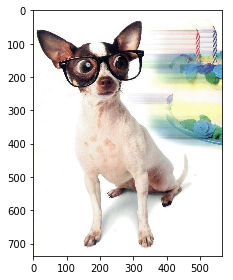

In [15]:
img_302 = training_df.iloc[302].values[1]
skimage.io.imshow(img_302);

In [16]:
img_302.shape 

(737, 568, 3)

The image shape is represented by a 3d array, where the first and second dimension represent the row and column pixel numbers, and the third value represents the color value. Remember that colors are represented by 3 values (r, b, g) and thus, the third dimension of this image will always be 3 (with each of the three values ranging from 0 to 255).

Now, we're going to build an image histogram. And the rest of this exploratory analysis will be based on Adrian Rosebrock's tutorials on pyimagesearch. He has a lot of opencv and computer vision tutorials that are great to follow if anyone is interested. I highly recommend them! 

References for the following code and analysis can be found in the [openCV documentation](https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html) on histograms and on Rosebrock's [tutorials](https://www.pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/). 

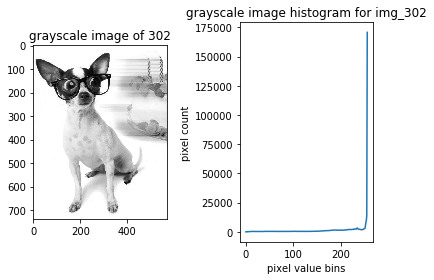

In [17]:
#let's convert our image into grayscale and look at that first: 
grayscale = cv2.cvtColor(img_302, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1,2)
axes[0].imshow(grayscale, "gray");
axes[0].set_title("grayscale image of 302")

hist = cv2.calcHist([grayscale], [0], None, [256], [0, 256])
axes[1].plot(hist)
axes[1].set_xlabel("pixel value bins")
axes[1].set_ylabel("pixel count")
axes[1].set_title("grayscale image histogram for img_302")


plt.tight_layout()

From both the grayscale picture and the histogram, you can obviously tell that there is a lot of white pixels, hence the large peak on the right side of the histogram.

Notice too, what the parameters of the cv2.calcHist() function takes in: 

1. the image as a list


2. the channel (as a list) that we want to compute, which is essentially a list of indices where grayscale is represented by 0, if we want the RGB channels, our indices will be (0, 1, 2) as a list


3. the mask image (which I will go deeper into later), but Rosebrock's post also has a great explanation


4. histogram size/ number of bins to use (as a list) 


5. range of possible pixel values (as a list) 

Now, we will take a look at each individual color scheme, red, blue, and green, and the corresponding image histogram distribution. 

Text(0.5, 1.0, 'Color histogram for image 302')

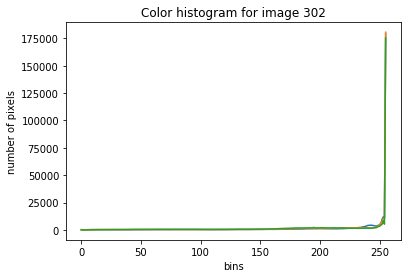

In [18]:
color = ("b", "g", "r")

for channel, color, in enumerate(color): 
    hist_channel = cv2.calcHist([img_302], [channel], None, [256], [0, 256])
    plt.plot(hist_channel)

plt.xlabel("bins")
plt.ylabel("number of pixels")
plt.title("Color histogram for image 302")

References: [read this](https://www.cambridgeincolour.com/tutorials/histograms1.htm)


Now this histogram is not very interesting, because remember, our original image was mainly white, except for the small splash of color in the upper right hand corner of the picture. And this small splash of color doesn't show up very well in the histogram because in the context of the entire image, it doesn't contribute as much to the image as the whiter pixels do. However, we can use "masking" to section out a portion of the image and create a small image histogram of the upper right hand corner. 

Masking is basically when you mask everything you don't want, so that you can section out the part of the image that you do want. The masking image has the same dimensions and pixels as the original image, except the pixels in the mask image which are 0, are ignored, and everything above 0 is used to compute the histogram.

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 <matplotlib.image.AxesImage at 0x1c6d138908>)

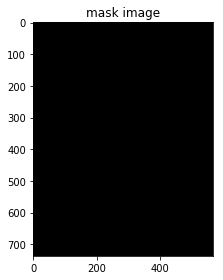

In [19]:
mask = np.zeros(img_302.shape[:2], np.uint8) #aka a copy of the 302 image without the 3rd (color) dimension

plt.title("mask image")
mask, skimage.io.imshow(mask) 
#note: mask is all 0's so this is basically a copy of the 302 image pixel dimension but all BLACK (see below)

We want to isolate the upper right hand corner of the image, so this means that we need to convert the upper right hand side to be a value greater than 0 (i.e. 255)). You may have to play around with the dimensions to get the right isolated section, visualizing it helps!

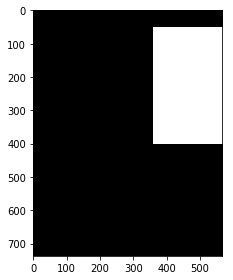

In [20]:
#     width ; height
mask[50: 400, 360:600] = 255
skimage.io.imshow(mask)

/Users/samanthatang/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


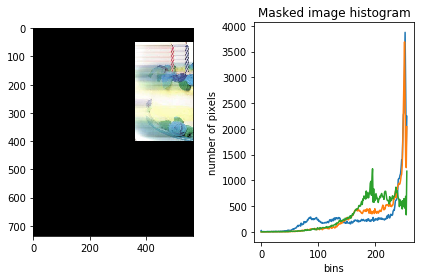

In [21]:
#bit_wise_and is basically masking the bits (see bit twiddling)
mask_image = cv2.bitwise_and(img_302, img_302, mask=mask) #getting the image that we want 

plt.subplot(121), skimage.io.imshow(mask_image)

#plotting the masked histogram (all colors, so for loop)
color = ("b", "g", "r")

for channel, color, in enumerate(color): 
    masked_hist = cv2.calcHist([img_302], [channel], mask, [256], [0,256])
    plt.subplot(122), plt.plot(masked_hist)

plt.subplot(122), plt.title("Masked image histogram")
plt.subplot(122), plt.xlabel("bins")
plt.subplot(122), plt.ylabel("number of pixels")


plt.tight_layout()

So it looks like there's a bit more fluctuation of color now that we've masked the colored section out. 

But another way that we can take a look at the colored section is to simply crop out the section we want instead of masking it. Then, we can construct an image histogram on the cropped out image. You'd see that the two image histograms (masked and cropped) are both the same. (see above and below histograms)

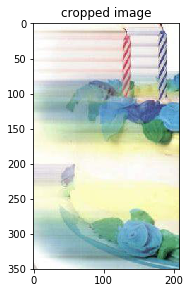

In [22]:
cropped_img = img_302[50:400, 360:600]
skimage.io.imshow(cropped_img)

plt.title("cropped image");

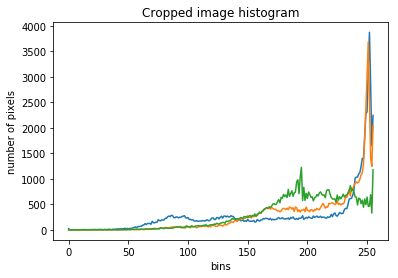

In [23]:
color = ("b", "g", "r")

for channel, color, in enumerate(color): 
    hist_channel = cv2.calcHist([cropped_img], [channel], None, [256], [0, 256])
    plt.plot(hist_channel)
    
plt.title("Cropped image histogram")
plt.ylabel("number of pixels")
plt.xlabel("bins");

At this point, we've focused on creating one channel image histograms, but we can also create multi-dimensional channel histograms as well. And this may be helpful in finding correlation/pairs of colors, which could be potentially useful as features for our animal classification. That is, large pixel counts of both black and white could mean that the image is a zebra or a panda. But at this point, I won't be creating any multi-dimensional histograms. Perhaps later in the analysis I will return to this thought. (Though you can take a look at how it's done in the pyimage post on Rosebrock's blog).

Instead, let's take a look at the other image that I've selected--the 1369th index image. 

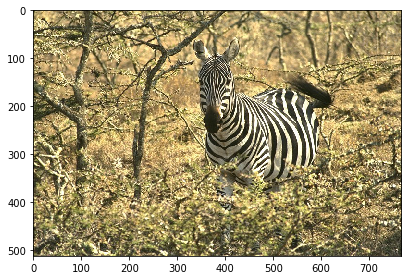

In [24]:
img_1369 = training_df.iloc[1369].values[1]
skimage.io.imshow(img_1369)

It's a zebra! Let's quickly perform the same analysis as we did for the 302nd image, but perhaps without all the masking and cropping of images and histograms.

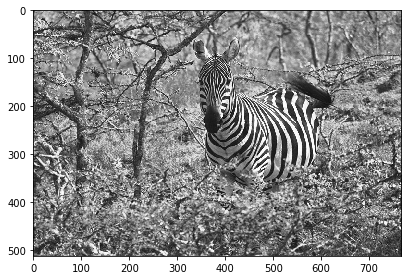

In [25]:
grayscale_1369 = cv2.cvtColor(img_1369, cv2.COLOR_BGR2GRAY)

skimage.io.imshow(grayscale_1369)
plt.show()

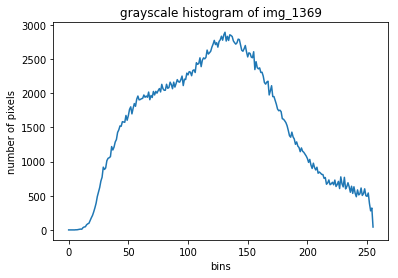

In [26]:
hist2 = cv2.calcHist([grayscale_1369], [0], None, [256], [0, 256])
plt.plot(hist2)
plt.title("grayscale histogram of img_1369")
plt.xlabel("bins")
plt.ylabel("number of pixels");


From the looks of it, its seems that my image is quite evenly distributed in that majority of my tonal colors are gray-ish (and not all overly white (left skewed) or black (right skewed)). And this can easily be observed by the even distribution of gray tones in the grayscale zebra image. This is in contrast to the grayscale 302 image which was overexposed (i.e. white) and had a primarily left-skewed histogram. 


References/Posts I've consulted to understand my histogram: 

[How to read image histogram](https://digital-photography-school.com/how-to-read-and-use-histograms/)

https://www.allaboutcircuits.com/technical-articles/image-histogram-characteristics-machine-learning-image-processing/

https://photographylife.com/landscapes/what-are-histograms-a-photographers-guide

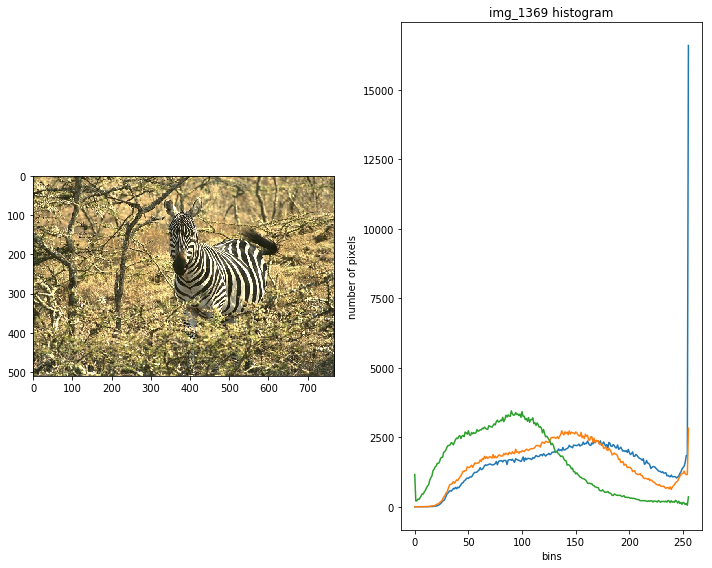

In [27]:
plt.figure(figsize=(10, 8))
plt.subplot(121), skimage.io.imshow(img_1369)
color = ("b", "g", "r")

for channel, color, in enumerate(color): 
    hist_channel = cv2.calcHist([img_1369], [channel], None, [256], [0, 256])
    plt.subplot(122), plt.plot(hist_channel)
    
plt.title("img_1369 histogram")
plt.ylabel("number of pixels")
plt.xlabel("bins");

plt.tight_layout()


So you'll see that there's lots of yellowish, "autumny" colors, which is why there are peaks at the green, red, and blue colors. There's also a peak at the end with blue since the color contributes to the stripes of the blackish stripes of the zebra.

At this point, it's fair to say that if I want to look at anymore images, it would be nice to have some functions created so that I don't have to keep rewriting the same code to create these grayscale or colored histograms.

In [28]:
def colored_hist(img): 
    '''Takes in an image and returns the colored rgb image histogram along with the visualized image'''
    
    plt.figure(figsize=(10, 8))
    plt.subplot(121), skimage.io.imshow(img
                                       )
    color = ("b", "g", "r")

    for channel, color, in enumerate(color): 
        hist_channel = cv2.calcHist([img], [channel], None, [256], [0, 256])
        plt.subplot(122), plt.plot(hist_channel)

    plt.title("img histogram")
    plt.ylabel("number of pixels")
    plt.xlabel("bins");

    plt.tight_layout()


def grayscale_hist(img): 
    '''Takes in an image and returns the grayscaled image histogram along with grayscaled image'''
    
    #let's convert our image into grayscale 
    grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    fig, axes = plt.subplots(1,2, figsize=(10, 8))
    axes[0].imshow(grayscale, "gray");
    axes[0].set_title("grayscale image")

    hist = cv2.calcHist([grayscale], [0], None, [256], [0, 256])
    axes[1].plot(hist)
    axes[1].set_xlabel("pixel value bins")
    axes[1].set_ylabel("pixel count")
    axes[1].set_title("grayscale image histogram")


    plt.tight_layout()

# Feature Extraction 

Now, that we've explored/interacted with the data a little bit, we'll now be organizing/aggregating some of the following image features: 

1. image size
2. type (i.e. colored or grayscaled)
3. average of red, blue, and green channel intensities
4. dominant color (see [link](https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv))
5. aspect ratio of image (see [link](https://en.wikipedia.org/wiki/Aspect_ratio_(image))), but it's basically the proportional relationship between height and width of image (or width / height)
Note: .shape gives (h, w, channels)

In [29]:
training_df["shape"] = [img.shape for img in training_df["pictures"]]
training_df["size"] = [img.size for img in training_df["pictures"]]
training_df.head()

,encoding,pictures,shape,size
0,1,"[[[75, 93, 79], [34, 52, 38], [27, 48, 33], [2...","(450, 594, 3)",801900
1,1,"[[[231, 205, 188], [228, 180, 144], [217, 179,...","(225, 148, 3)",99900
2,1,"[[[255, 252, 249], [255, 252, 249], [255, 253,...","(268, 272, 3)",218688
3,1,"[[[173, 166, 160], [175, 168, 162], [178, 171,...","(476, 500, 3)",714000
4,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 768, 3)",1179648


While trying to find the average color channel intensities, I got errors saying "IndexError: too many indices for array", and after checking my code and testing it on a smaller subset, I realized that some images given in the training set (and perhaps the test set) weren't color images. Taking this into consideration, I extracted the images that had no color channel (i.e. the length of the shape tuple in the "shape" column was less than 3). As such, I will be adding a column indicating whether the image is colored or not.  

In [30]:
boolean = [3 == length for length in [len(tup) for tup in training_df["shape"].values]]

training_df[[not b for b in boolean]] #not colored

,encoding,pictures,shape,size
89,2,"[[191, 191, 191, 192, 192, 193, 193, 193, 191,...","(477, 595)",283815
130,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(262, 432)",113184
135,3,"[[15, 10, 10, 13, 13, 9, 10, 15, 13, 12, 11, 1...","(480, 640)",307200
137,3,"[[7, 7, 7, 8, 8, 9, 9, 9, 10, 8, 6, 4, 5, 9, 1...","(480, 640)",307200
145,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(339, 440)",149160
160,3,"[[12, 12, 12, 12, 12, 12, 12, 12, 17, 15, 14, ...","(193, 250)",48250
162,3,"[[0, 0, 0, 1, 3, 2, 0, 0, 14, 0, 7, 4, 0, 23, ...","(333, 500)",166500
165,3,"[[25, 23, 21, 19, 19, 20, 22, 23, 13, 20, 27, ...","(387, 472)",182664
173,3,"[[27, 31, 31, 28, 31, 39, 44, 42, 43, 42, 44, ...","(351, 403)",141453
176,3,"[[36, 37, 38, 39, 41, 42, 43, 43, 38, 39, 39, ...","(340, 472)",160480


In [31]:
gray_image_indices = training_df[[not b for b in boolean]].index

training_df["type"] = ["color"] * len(training_df)
training_df.head()

,encoding,pictures,shape,size,type
0,1,"[[[75, 93, 79], [34, 52, 38], [27, 48, 33], [2...","(450, 594, 3)",801900,color
1,1,"[[[231, 205, 188], [228, 180, 144], [217, 179,...","(225, 148, 3)",99900,color
2,1,"[[[255, 252, 249], [255, 252, 249], [255, 253,...","(268, 272, 3)",218688,color
3,1,"[[[173, 166, 160], [175, 168, 162], [178, 171,...","(476, 500, 3)",714000,color
4,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 768, 3)",1179648,color


In [32]:
# https://stackoverflow.com/questions/12307099/modifying-a-subset-of-rows-in-a-pandas-dataframe
#for how to change/replace/modify selected rows 
training_df.loc[training_df.index.isin(gray_image_indices), "type"] = "gray"

In [33]:
training_df.iloc[gray_image_indices]

,encoding,pictures,shape,size,type
89,2,"[[191, 191, 191, 192, 192, 193, 193, 193, 191,...","(477, 595)",283815,gray
130,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(262, 432)",113184,gray
135,3,"[[15, 10, 10, 13, 13, 9, 10, 15, 13, 12, 11, 1...","(480, 640)",307200,gray
137,3,"[[7, 7, 7, 8, 8, 9, 9, 9, 10, 8, 6, 4, 5, 9, 1...","(480, 640)",307200,gray
145,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(339, 440)",149160,gray
160,3,"[[12, 12, 12, 12, 12, 12, 12, 12, 17, 15, 14, ...","(193, 250)",48250,gray
162,3,"[[0, 0, 0, 1, 3, 2, 0, 0, 14, 0, 7, 4, 0, 23, ...","(333, 500)",166500,gray
165,3,"[[25, 23, 21, 19, 19, 20, 22, 23, 13, 20, 27, ...","(387, 472)",182664,gray
173,3,"[[27, 31, 31, 28, 31, 39, 44, 42, 43, 42, 44, ...","(351, 403)",141453,gray
176,3,"[[36, 37, 38, 39, 41, 42, 43, 43, 38, 39, 39, ...","(340, 472)",160480,gray


You can see/select the images, and confirm that these images are in fact grayscale and not colored. 

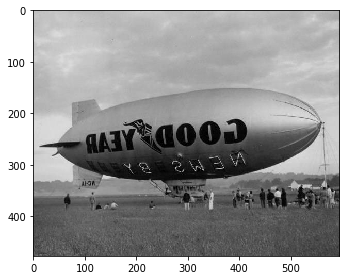

In [34]:
img_89 = training_df.iloc[89].values[1]
skimage.io.imshow(img_89)

Now, we can find the average color channel intensities for each color per image. 

Note: We know that the color channel order is BGR because by default, openCV reads in the channels in this order.

In [35]:
def color_channel_avg(df, color): 
    
    """Takes in a dataframe DF that has a 'type' and 'pictures' column 
    and returns the average color intensity for the COLOR number specified.
    
    Takes: 
    DF: dataframe with 'type' and 'pictures' column
    COLOR: channel number where 0 = blue, 1 = green, and 2 = red
    (bgr order because of openCV)
    
    Returns: 
    A list of averages for that COLOR channel
    
    """
    
    average = []
    
    for index in np.arange(len(df)): 
        if df.iloc[index]["type"] == "color": 
            avg = np.average(df.iloc[index]["pictures"][:, :, color])
            average.append(avg)
        else: 
            average.append(0)
            
    return average

In [36]:
# color_channel_avg(training_df, 0)

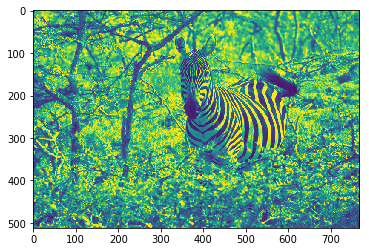

In [37]:
plt.imshow(training_df.iloc[1369]["pictures"][:, :, 0]); #only blue channel

In [38]:
print("blue avg: ", np.mean(training_df.iloc[1369]["pictures"][:, :, 0]))
print("green avg: ", np.mean(training_df.iloc[1369]["pictures"][:, :, 1]))
print("red avg: ", np.mean(training_df.iloc[1369]["pictures"][:, :, 2]))

blue avg:  151.8945083618164
green avg:  136.87965393066406
red avg:  92.40813954671223


In [39]:
test = training_df.iloc[:3] #simple sanity check
test

,encoding,pictures,shape,size,type
0,1,"[[[75, 93, 79], [34, 52, 38], [27, 48, 33], [2...","(450, 594, 3)",801900,color
1,1,"[[[231, 205, 188], [228, 180, 144], [217, 179,...","(225, 148, 3)",99900,color
2,1,"[[[255, 252, 249], [255, 252, 249], [255, 253,...","(268, 272, 3)",218688,color


In [40]:
[np.mean(img[:, :, 0]) for img in test["pictures"]]

[62.17111485222596, 125.10564564564565, 108.19991494732221]

In [41]:
training_df["avg_blue"] = color_channel_avg(training_df, 0) #blue
training_df["avg_green"] = color_channel_avg(training_df, 1) #green
training_df["avg_red"] = color_channel_avg(training_df, 2) #red

In [42]:
training_df.head()

,encoding,pictures,shape,size,type,avg_blue,avg_green,avg_red
0,1,"[[[75, 93, 79], [34, 52, 38], [27, 48, 33], [2...","(450, 594, 3)",801900,color,62.171115,86.883483,44.882873
1,1,"[[[231, 205, 188], [228, 180, 144], [217, 179,...","(225, 148, 3)",99900,color,125.105646,113.291952,92.753093
2,1,"[[[255, 252, 249], [255, 252, 249], [255, 253,...","(268, 272, 3)",218688,color,108.199915,102.747942,84.074503
3,1,"[[[173, 166, 160], [175, 168, 162], [178, 171,...","(476, 500, 3)",714000,color,76.950395,80.475538,87.319319
4,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 768, 3)",1179648,color,151.252314,157.446948,155.376996


In [43]:
#sanity check with 1369 image (as seen above)
training_df.iloc[1369]

encoding                                                    19
pictures     [[[75, 76, 44], [95, 97, 60], [107, 108, 66], ...
shape                                            (512, 768, 3)
size                                                   1179648
type                                                     color
avg_blue                                               151.895
avg_green                                               136.88
avg_red                                                92.4081
Name: 1369, dtype: object

Now that we have the average intensities, we will be finding the dominant color. That is, which color channel is represented in the picture the most (see [link](https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv)) and also [here](http://www.aishack.in/tutorials/dominant-color/). 

Taking a look at the information row for img_1369 (above), the average blue intensity channel has the highest average and this makes sense if we remember the colored image histogram we saw before where the blue channel seem to have the highest contribution. We'll see if this conclusion stays consistent with what the dominant color of the image will be . . . 

In [72]:
# Note the source code for this is from the following website:
# https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/
# of course I can code it from scratch too, and there are many resources telling you how
# through, for convenience, and considering how this project is a learning experience
# I will be using the code from adam spannbauer's website

# Note: there is also another notebook "dominant_color_example" 
# going through step-by-step what each line does inside the function

def get_dom_color(image, k=3):
    '''Takes in an image and k number of clusters 
    to use when finding/calculating the dominant color'''
    
    if len(image.shape) < 3: #if grayscale (then only width, height, no color/rgb)
        return "grayscale"

    else:
#         if resize == True: 

        if image.shape[0] > 250 or image.shape[1] > 250: 
            image = cv2.resize(image, (250, 250), interpolation = cv2.INTER_AREA)

        image = image.reshape((image.shape[0] * image.shape[1], 3)) #reshape into 2D array 

        clt = KMeans(n_clusters=k)
        labels = clt.fit_predict(image)


        label_counts = Counter(labels)

        dom_color = clt.cluster_centers_[label_counts.most_common(1)[0][0]]

        return list(dom_color)


Now let's take a look at what the calculated dominant color is, and how it compares to the features we've calculated so far. It'll also be helpful to play around with some of the parameters to figure out what to use to get the best/most useful results. 

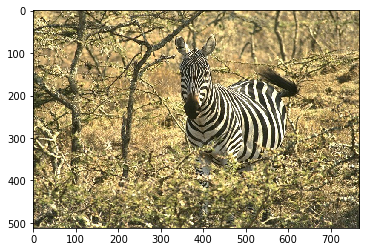

In [73]:
plt.imshow(img_1369)

In [74]:
import time

In [76]:
start = time.time() 
d = get_dom_color(img_1369)
end = time.time()

print("Time it takes: ", end - start)
d

Time it takes:  0.744013786315918


[155.89010150346977, 139.10085476608498, 91.83152713119074]

The dominant color generated from the rgb values above can be seen in the following color patch: 

<img src='pics/orig.png'>

These rgb values were generated using a shrunken image (by default in the function to make things faster), and it is still evident that this dominant color is very representative of the yellow-autumn/golden color dominant in the original zebra image of 1369.

You'll notice too, that if we gather/generate the dominant color using only one cluster, we simply get the averaged rgb values that we found before. See below: 

In [78]:
start = time.time()
d = get_dom_color(img_1369, 1)
end = time.time()

print("Time it takes: ", end - start)
d

Time it takes:  0.1473250389099121


[151.89628800000753, 136.88155199999514, 92.40743999999768]

But before we apply this "get_dom_color" function on the training_df data, remember we have some images that are grayscaled, so if we apply it to these images, then the "dominant" color would be gray or black or white. This wouldn't give us any useful information. For instance, take a look below. 

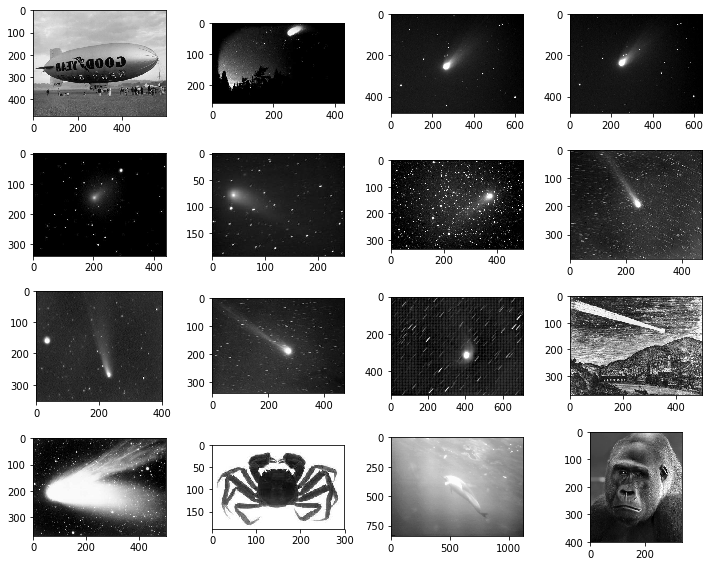

In [79]:
fig, ax = plt.subplots(4, 4, figsize=(10, 8))

row = 0
col = 0
for i in np.arange(len(gray_image_indices)):
    ax[row, col].imshow(training_df.iloc[gray_image_indices[i]]["pictures"], cmap="gray")
    col += 1
    if col >=4: 
        col = 0
        row += 1

plt.tight_layout()

Notice, that there are a lot of grayscale images of comets, but in color, comets look something like what's shown below.

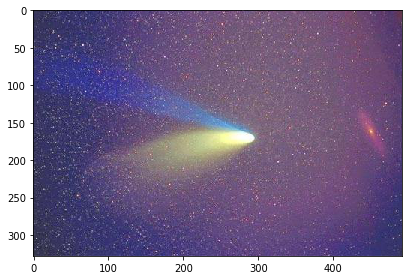

In [80]:
skimage.io.imshow(training_df[training_df["encoding"] == 3].iloc[1]["pictures"])

In [70]:
training_df.head()

,encoding,pictures,shape,size,type,avg_blue,avg_green,avg_red
0,1,"[[[75, 93, 79], [34, 52, 38], [27, 48, 33], [2...","(450, 594, 3)",801900,color,62.171115,86.883483,44.882873
1,1,"[[[231, 205, 188], [228, 180, 144], [217, 179,...","(225, 148, 3)",99900,color,125.105646,113.291952,92.753093
2,1,"[[[255, 252, 249], [255, 252, 249], [255, 253,...","(268, 272, 3)",218688,color,108.199915,102.747942,84.074503
3,1,"[[[173, 166, 160], [175, 168, 162], [178, 171,...","(476, 500, 3)",714000,color,76.950395,80.475538,87.319319
4,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 768, 3)",1179648,color,151.252314,157.446948,155.376996


In [84]:
d_color = training_df["pictures"].iloc[:3].apply(get_dom_color)
d_color #small example to test

0    [64.81657514359772, 93.95117717603786, 45.6921...
1    [30.182443588335303, 28.50282058337561, 19.378...
2    [44.10757031160995, 33.086078482220415, 18.226...
Name: pictures, dtype: object

In [85]:
d_color = training_df["pictures"].apply(get_dom_color)
d_color #takes forever to run, but it works

0       [64.81657514359772, 93.95117717603786, 45.6921...
1       [30.182443588335303, 28.50282058337561, 19.378...
2       [44.029482752197055, 33.00048271507494, 18.156...
3       [36.73373725429723, 40.82385104182016, 54.6150...
4       [170.86111552881707, 178.22469612633589, 179.3...
5       [121.30407523510755, 132.2437877513567, 97.877...
6       [199.3322655473125, 221.23546522333388, 190.73...
7       [37.323251017899295, 29.76362963351312, 22.715...
8       [98.09595940891289, 101.17569719640254, 62.890...
9       [182.17998772255552, 175.43851033355784, 131.1...
10      [234.3979131815193, 233.4499985823767, 224.890...
11      [82.78215875586436, 43.481181707817825, 42.806...
12      [16.085503963740877, 16.27573298098207, 16.305...
13      [12.203621748589057, 24.174855491297635, 7.116...
14      [224.13035028676134, 218.0108072237851, 188.64...
15      [34.80249070035816, 34.850590328348495, 24.244...
16      [34.994585814819004, 53.47448565242718, 48.572...
17      [244.5

In [86]:
training_df["dom_color"] = d_color
training_df.head()

,encoding,pictures,shape,size,type,avg_blue,avg_green,avg_red,dom_color
0,1,"[[[75, 93, 79], [34, 52, 38], [27, 48, 33], [2...","(450, 594, 3)",801900,color,62.171115,86.883483,44.882873,"[64.81657514359772, 93.95117717603786, 45.6921..."
1,1,"[[[231, 205, 188], [228, 180, 144], [217, 179,...","(225, 148, 3)",99900,color,125.105646,113.291952,92.753093,"[30.182443588335303, 28.50282058337561, 19.378..."
2,1,"[[[255, 252, 249], [255, 252, 249], [255, 253,...","(268, 272, 3)",218688,color,108.199915,102.747942,84.074503,"[44.029482752197055, 33.00048271507494, 18.156..."
3,1,"[[[173, 166, 160], [175, 168, 162], [178, 171,...","(476, 500, 3)",714000,color,76.950395,80.475538,87.319319,"[36.73373725429723, 40.82385104182016, 54.6150..."
4,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 768, 3)",1179648,color,151.252314,157.446948,155.376996,"[170.86111552881707, 178.22469612633589, 179.3..."


In [95]:
from math import gcd

In [101]:
def aspect_ratio(arr): 
    """Given the array of values consisting of shape tuples, return the aspect ratio.
    
    Input:
    Array of shape tuples where shape[0] = h, shape[1] = w and w/h is the aspect ratio
    
    Return: 
    A list of tuple aspect ratios
    
    """
    
    asp_rat = []
    
    for i in arr: 
        w = i[1]
        h = i[0]
        
        common_divisor = gcd(w, h)
        
        w = w/common_divisor
        h = h/common_divisor
        
        asp_rat.append((w, h))
    
    return asp_rat

# aspect_ratio(training_df["shape"].iloc[:3].values) #check

In [110]:
a_ratio = aspect_ratio(training_df["shape"].values)

In [111]:
training_df["aspect_ratio"] = a_ratio #note: it's (w, h)
training_df.head()

,encoding,pictures,shape,size,type,avg_blue,avg_green,avg_red,dom_color,aspect_ratio
0,1,"[[[75, 93, 79], [34, 52, 38], [27, 48, 33], [2...","(450, 594, 3)",801900,color,62.171115,86.883483,44.882873,"[64.81657514359772, 93.95117717603786, 45.6921...","(33.0, 25.0)"
1,1,"[[[231, 205, 188], [228, 180, 144], [217, 179,...","(225, 148, 3)",99900,color,125.105646,113.291952,92.753093,"[30.182443588335303, 28.50282058337561, 19.378...","(148.0, 225.0)"
2,1,"[[[255, 252, 249], [255, 252, 249], [255, 253,...","(268, 272, 3)",218688,color,108.199915,102.747942,84.074503,"[44.029482752197055, 33.00048271507494, 18.156...","(68.0, 67.0)"
3,1,"[[[173, 166, 160], [175, 168, 162], [178, 171,...","(476, 500, 3)",714000,color,76.950395,80.475538,87.319319,"[36.73373725429723, 40.82385104182016, 54.6150...","(125.0, 119.0)"
4,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 768, 3)",1179648,color,151.252314,157.446948,155.376996,"[170.86111552881707, 178.22469612633589, 179.3...","(3.0, 2.0)"


In [113]:
#exporting training and testing dataframe as csv's for later use
training_df.to_csv(r"/Users/samanthatang/Desktop/exported_training.csv", index=False, header=True)
test_df.to_csv(r"/Users/samanthatang/Desktop/exported_testing.csv", index = False, header=True)